## Import Libararies

In [66]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import KFold , cross_val_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier


## Data Collection And Statical Analysis 

In [28]:
df = pd.read_csv("creditcard.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


-Showing dataset and some Visualization

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [30]:
df.var()

Time      2.255124e+09
V1        3.836489e+00
V2        2.726820e+00
V3        2.299029e+00
V4        2.004684e+00
V5        1.905081e+00
V6        1.774946e+00
V7        1.530401e+00
V8        1.426479e+00
V9        1.206992e+00
V10       1.185594e+00
V11       1.041855e+00
V12       9.984034e-01
V13       9.905708e-01
V14       9.189055e-01
V15       8.378034e-01
V16       7.678191e-01
V17       7.213734e-01
V18       7.025394e-01
V19       6.626619e-01
V20       5.943254e-01
V21       5.395255e-01
V22       5.266428e-01
V23       3.899507e-01
V24       3.668084e-01
V25       2.717308e-01
V26       2.325429e-01
V27       1.629192e-01
V28       1.089550e-01
Amount    6.256007e+04
Class     1.724507e-03
dtype: float64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Data Cleaning

In [32]:
#check for null values 
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [33]:
#Duplicate handling
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (1081, 31)


In [34]:
df.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Data Visualization

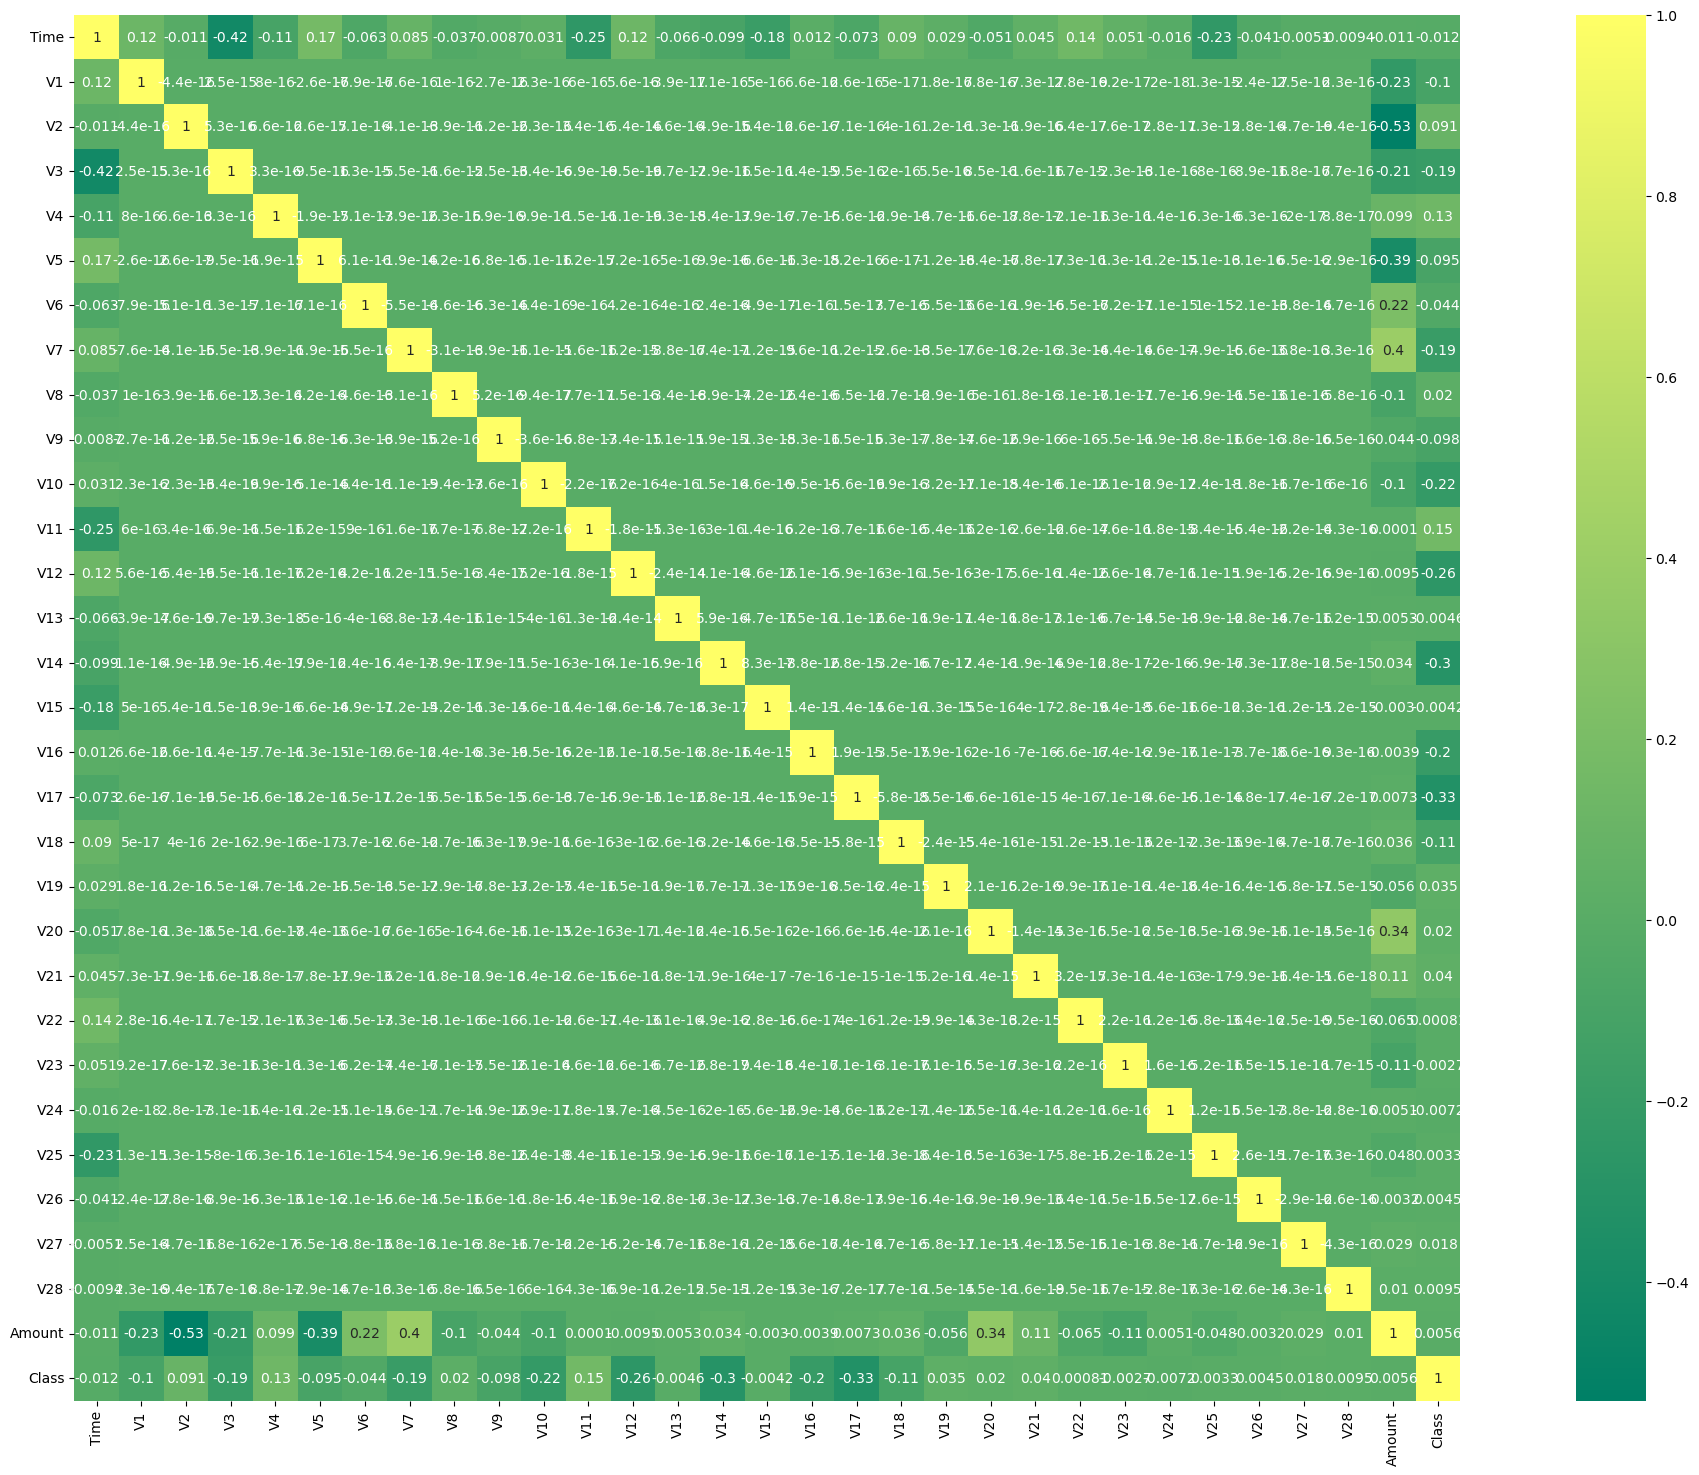

In [77]:
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(),cmap='summer', annot=True, square=True,  )
plt.show()

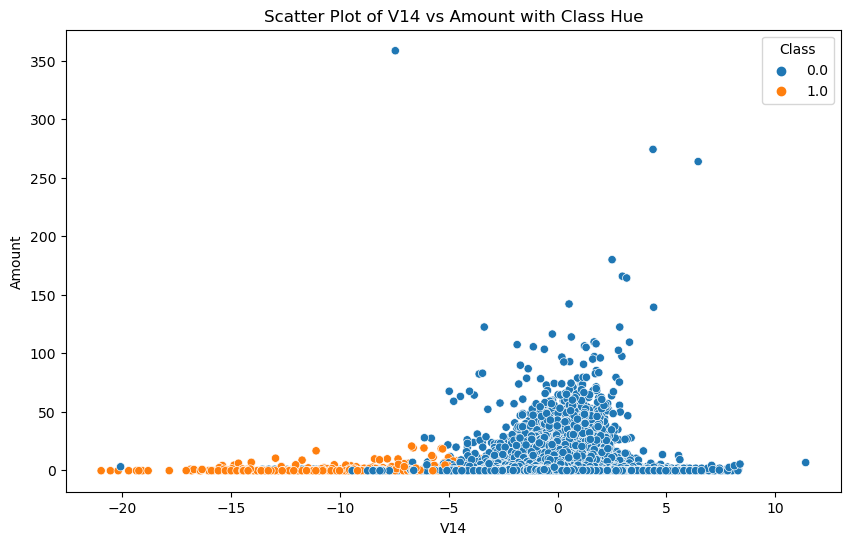

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='V14', y='Amount', hue='Class', data=df)
plt.title('Scatter Plot of V14 vs Amount with Class Hue')
plt.xlabel('V14')
plt.ylabel('Amount')
plt.legend(title='Class', loc='upper right')
plt.show()

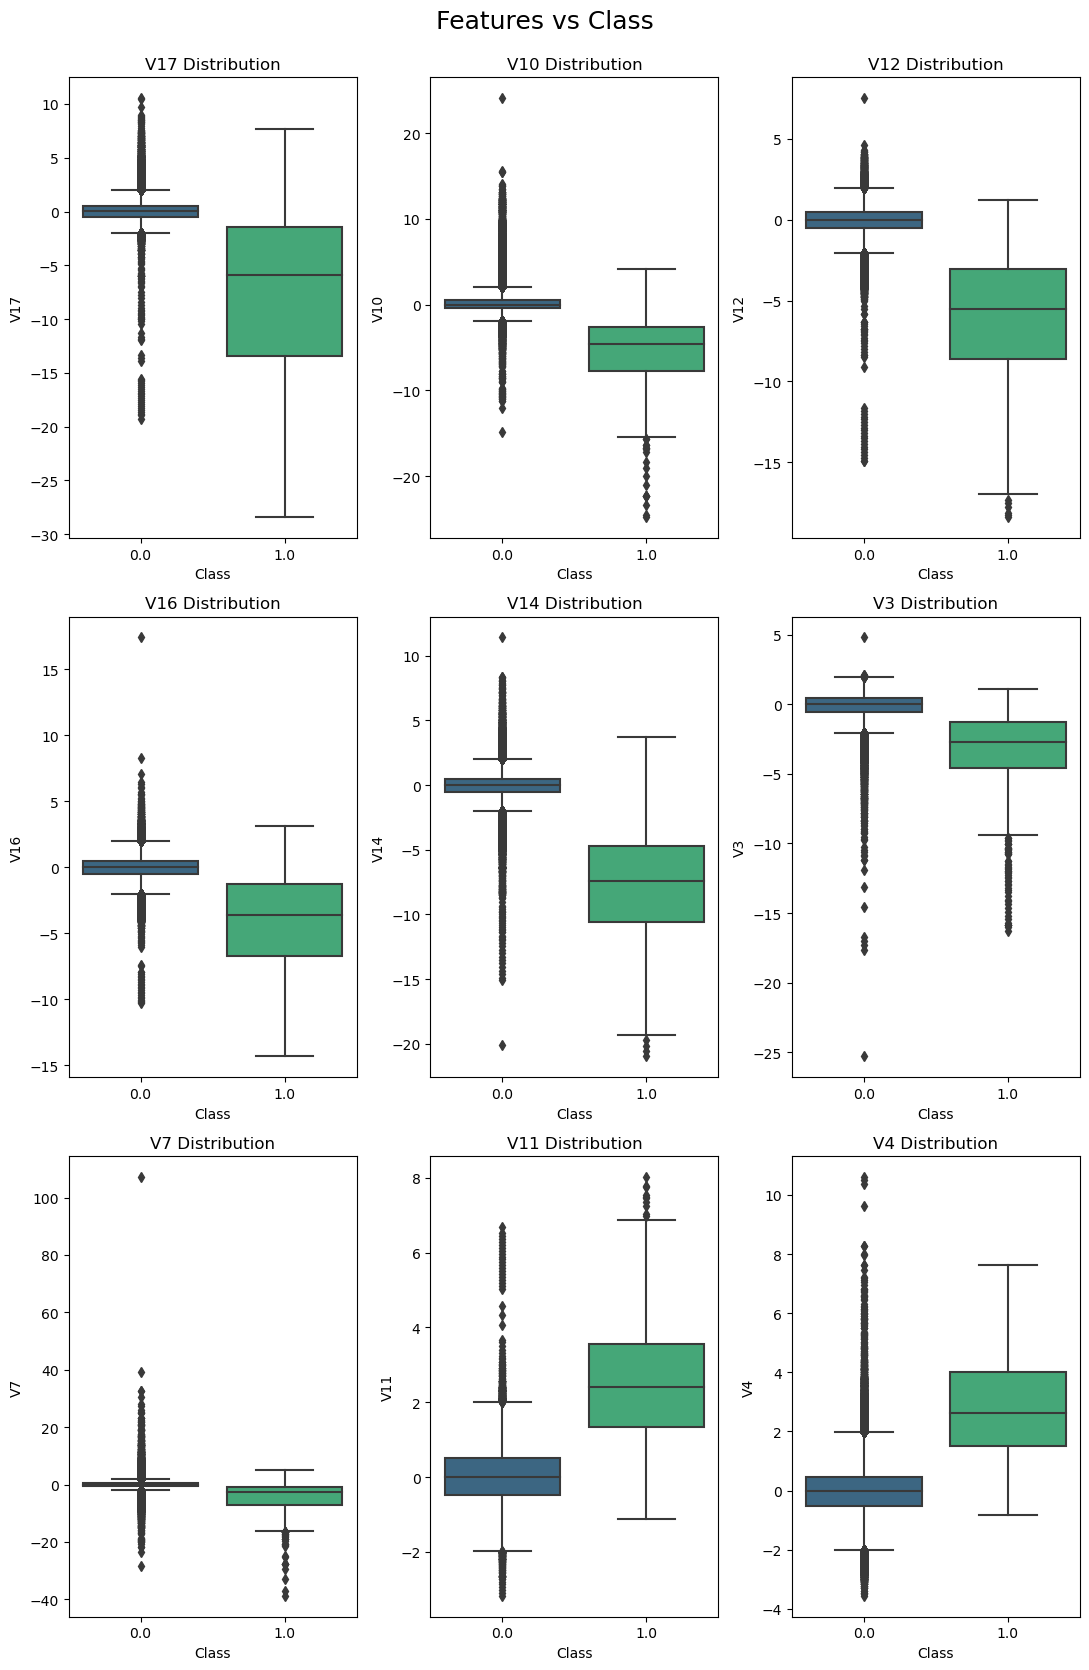

In [80]:
# Create subplots for visualizing features vs. Class
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(11, 17))
fig.suptitle('Features vs Class\n', size=18)

# Define the features you want to visualize
features_to_visualize = ['V17', 'V10', 'V12', 'V16', 'V14', 'V3', 'V7', 'V11', 'V4']

# Create boxplots for each feature
for i, feature in enumerate(features_to_visualize):
    row, col = i // 3, i % 3  # Calculate the row and column for the subplot

    # Create a boxplot for the feature grouped by 'Class' using the viridis palette
    sns.boxplot(ax=axes[row, col], data=df, x='Class', y=feature, palette='viridis')
    axes[row, col].set_title(f"{feature} Distribution")

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

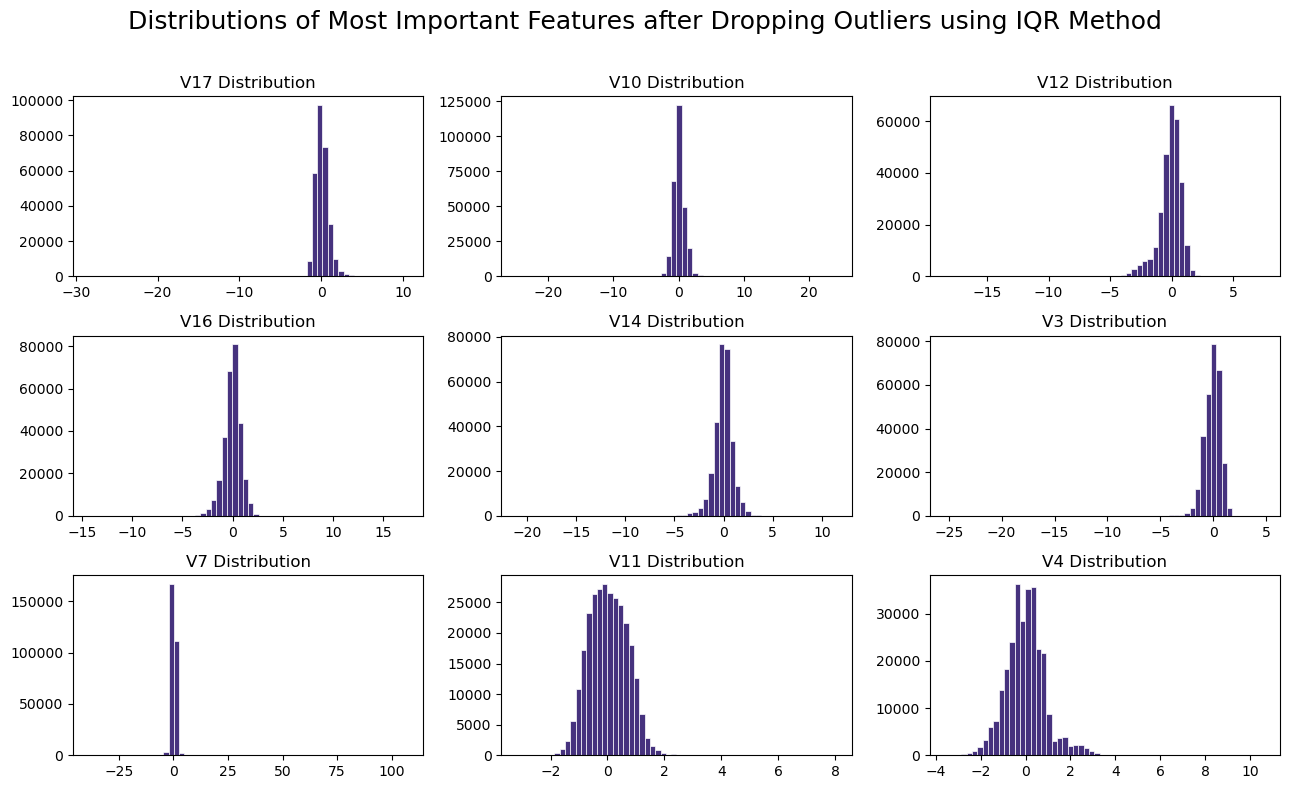

In [81]:
# Set the color palette to 'viridis'
sns.set_palette('viridis')

# Create subplots for visualizing the distributions of important features after outlier removal
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 8))
fig.suptitle('Distributions of Most Important Features after Dropping Outliers using IQR Method\n', size=18)

# Plot histograms for each feature
axes[0, 0].hist(df['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0, 0].set_title("V17 Distribution")

axes[0, 1].hist(df['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0, 1].set_title("V10 Distribution")

axes[0, 2].hist(df['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0, 2].set_title("V12 Distribution")

axes[1, 0].hist(df['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1, 0].set_title("V16 Distribution")

axes[1, 1].hist(df['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1, 1].set_title("V14 Distribution")

axes[1, 2].hist(df['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1, 2].set_title("V3 Distribution")

axes[2, 0].hist(df['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2, 0].set_title("V7 Distribution")

axes[2, 1].hist(df['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2, 1].set_title("V11 Distribution")

axes[2, 2].hist(df['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2, 2].set_title("V4 Distribution")

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


The lower bound value is: -2.0167809939439634
The upper bound value is: 2.060396765004443


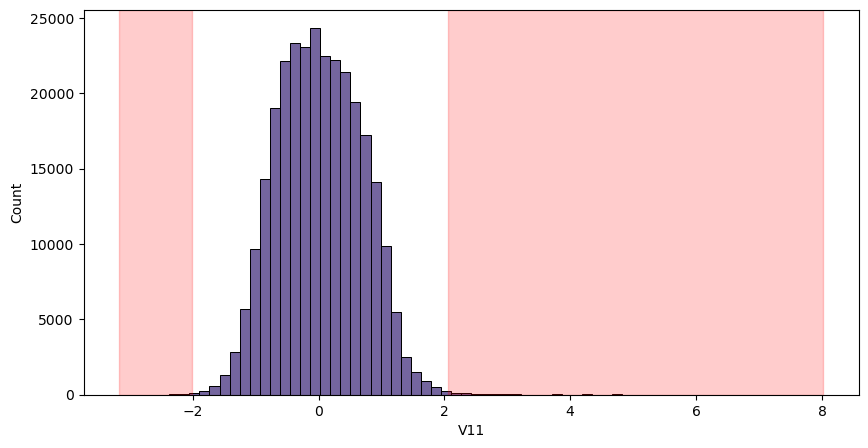

In [82]:
# Calculate the mean and standard deviation of the 'V11' feature
data_mean, data_std = df['V11'].mean(), df['V11'].std()

# Calculate the cutoff value (3 standard deviations from the mean)
cut_off = data_std * 3

# Calculate the lower and upper bounds
lower, upper = data_mean - cut_off, data_mean + cut_off

# Print the lower and upper bound values
print('The lower bound value is:', lower)
print('The upper bound value is:', upper)

# Set the color palette to 'viridis'
sns.set_palette('viridis')

# Create a histogram to visualize the 'V11' feature
plt.figure(figsize=(10, 5))
sns.histplot(x='V11', data=df, bins=70)

# Highlight the regions outside the bounds in red
plt.axvspan(xmin=lower, xmax=df['V11'].min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=df['V11'].max(), alpha=0.2, color='red')

# Show the plot
plt.show()

## Data Preprocessing, Encoding

In [35]:
l =df.columns.to_list()

In [36]:
RC=RobustScaler()
df=RC.fit_transform(df)
df=pd.DataFrame(df,columns=l)

In [37]:
x=df.drop(['Class'],axis=1)
y=df['Class']

In [38]:
smote = SMOTE()

xx, yy = smote.fit_resample(x.astype('float'),y)
from collections import Counter
print("Before SMOTE :" , Counter(y))
print("After SMOTE :" , Counter(yy))

Before SMOTE : Counter({0.0: 284315, 1.0: 492})
After SMOTE : Counter({0.0: 284315, 1.0: 284315})


In [39]:
x_train,x_test,y_train,y_test=train_test_split(xx,yy,test_size=.3,random_state=42)

## ML Models

Logistic Regression

In [54]:
LR=LogisticRegression(C=0.01)
LR.fit(x_train,y_train)
print("Train score:{:.2f}%".format((LR.score(x_train,y_train))*100))
print("Test score:{:.2f}%".format((LR.score(x_test,y_test))*100))

Train score:94.71%
Test score:94.71%


In [44]:
con = confusion_matrix(y_test , LR.predict(x_test) )
print(con)

[[83135  2014]
 [ 7008 78432]]


In [45]:
print (classification_report(y_test, LR.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     85149
         1.0       0.97      0.92      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



Logistic regression after kFolds

In [46]:
K_fold = KFold(n_splits= 7 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(LR , xx,yy , cv = K_fold , scoring= scoring)
print (score)

[0.94780446 0.94656113 0.94743516 0.94696737 0.94528086 0.94813684
 0.94648661]


Decision Tree

In [53]:
DT=DecisionTreeClassifier(max_depth=10,max_features=10)
DT.fit(x_train,y_train)
print("Train score:{:.2f}%".format((DT.score(x_train,y_train))*100))
print("Test score:{:.2f}%".format((DT.score(x_test,y_test))*100))


Train score:98.18%
Test score:98.08%


In [49]:
con = confusion_matrix(y_test , DT.predict(x_test) )
print(con)

[[83871  1278]
 [ 1759 83681]]


In [55]:
print (classification_report(y_test, DT.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     85149
         1.0       0.98      0.98      0.98     85440

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589



Decision tree after kfolds


In [56]:
K_fold = KFold(n_splits= 7 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(DT , xx,yy , cv = K_fold , scoring= scoring)
print (score)
print(round(np.mean(score)*100 , 2))

[0.97501016 0.9802174  0.98473527 0.97339751 0.97078773 0.97684439
 0.97577309]
97.67


Random Forest

In [58]:
RF = RandomForestClassifier(n_estimators= 15 , max_depth=10 ,max_features= 11)

In [60]:
RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features=11, n_estimators=15)

In [61]:
print("Train score:{:.2f}%".format((RF.score(x_train,y_train))*100))
print("Test score:{:.2f}%".format((RF.score(x_test,y_test))*100))

Train score:99.22%
Test score:99.14%


In [63]:
con = confusion_matrix(y_test ,RF.predict(x_test) )
print(con)

[[84850   299]
 [ 1174 84266]]


In [64]:
print (classification_report(y_test , RF.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     85149
         1.0       1.00      0.99      0.99     85440

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



AdaBoost

In [75]:
ADA=AdaBoostClassifier(n_estimators = 15, learning_rate=0.25)
ADA.fit(x_train,y_train)
print("Train score:{:.2f}%".format((ADA.score(x_train,y_train))*100))
print("Test score:{:.2f}%".format((ADA.score(x_test,y_test))*100))

Train score:93.78%
Test score:93.76%


In [68]:
con = confusion_matrix(y_test,ADA.predict(x_test) )
print(con)

[[83581  1568]
 [ 9081 76359]]


In [69]:
print (classification_report(y_test , ADA.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94     85149
         1.0       0.98      0.89      0.93     85440

    accuracy                           0.94    170589
   macro avg       0.94      0.94      0.94    170589
weighted avg       0.94      0.94      0.94    170589



Adaboost after kfolds

In [70]:
K_fold = KFold(n_splits= 7 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(ADA , xx,yy , cv = K_fold , scoring= scoring)
print (score)
print(round(np.mean(score)*100 , 2))

[0.93537109 0.93537109 0.93724225 0.93594968 0.93487868 0.93594968
 0.93592427]
93.58


K-Neighbors-Classifier

In [71]:
KNN = KNeighborsClassifier(n_neighbors = 4)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [76]:
print("Train score:{:.2f}%".format((KNN.score(x_train,y_train))*100))
print("Test score:{:.2f}%".format((KNN.score(x_test,y_test))*100))

Train score:99.95%
Test score:99.89%


In [73]:
con = confusion_matrix(y_test,KNN.predict(x_test) )
print(con)

[[84961   188]
 [    0 85440]]


In [74]:
print (classification_report(y_test , KNN.predict(x_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85149
         1.0       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



## END